# Download The Data from Kaggle.com

In [1]:
! mkdir -p '/root/.kaggle/'
! echo '{"username":"ourgradai","key":"bf42634790f7c44a36a647f5d83a0d6e"}' > /root/.kaggle/kaggle.json
! export KAGGLE_CONFIG_DIR="/root/.kaggle"
! chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d mlg-ulb/creditcardfraud
! unzip -n -qq /content/creditcardfraud.zip
! rm -r /content/sample_data
! rm /content/creditcardfraud.zip

 89% 59.0M/66.0M [00:00<00:00, 213MB/s]
100% 66.0M/66.0M [00:00<00:00, 206MB/s]


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Reading the Data using Pandas

In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv',  error_bad_lines=False)
# Explore the dataset
df.head()

<ipython-input-3-d6bb5983013c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('creditcard.csv',  error_bad_lines=False)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-Processing

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df = df.drop(columns= ['Time'])

In [9]:
# Assume 'Class' column is the target variable, and other columns are features
y = df['Class']
df = df.drop(columns= ['Class'])

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


Class Imbalance

In [10]:
undersample = RandomUnderSampler(sampling_strategy=0.5)

In [11]:
X_un, Y_un = undersample.fit_resample(df, y)

Split data into features (X) and labels (y)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_un, Y_un, test_size=0.2, random_state=42,stratify=Y_un)

Feature Scaling

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Engineering

In [14]:
# 1. Transaction amount statistics per user
df['Mean_Amount_User'] = df.groupby('V1')['Amount'].transform('mean')
df['Min_Amount_User'] = df.groupby('V1')['Amount'].transform('min')
df['Max_Amount_User'] = df.groupby('V1')['Amount'].transform('max')

# 2. Log-transformed Amount
df['Log_Amount'] = np.log1p(df['Amount'])

# 3. Transaction frequency per user
df['Transaction_Frequency_User'] = df.groupby('V1')['V1'].transform('count')

# EDA

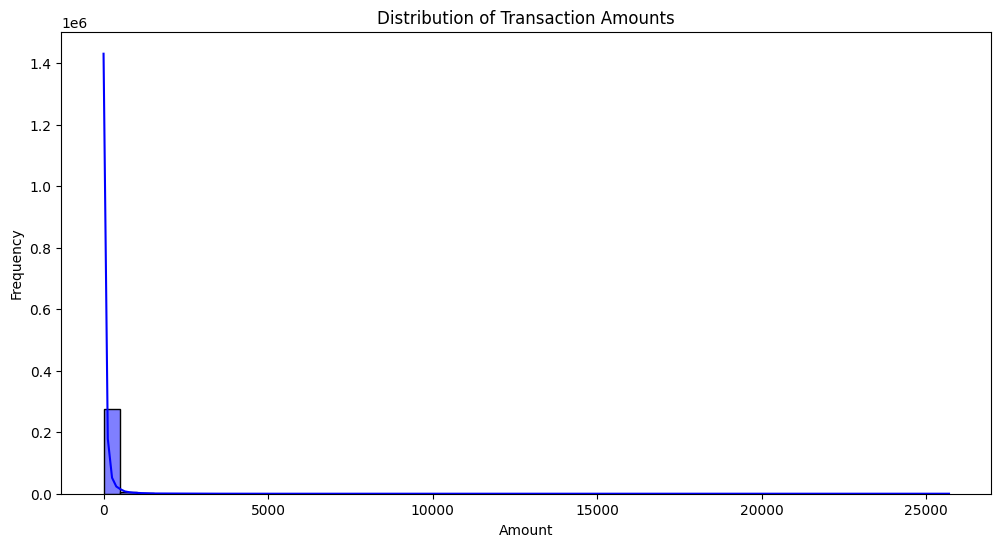

In [16]:
# EDA - Visualizations
# 1. Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

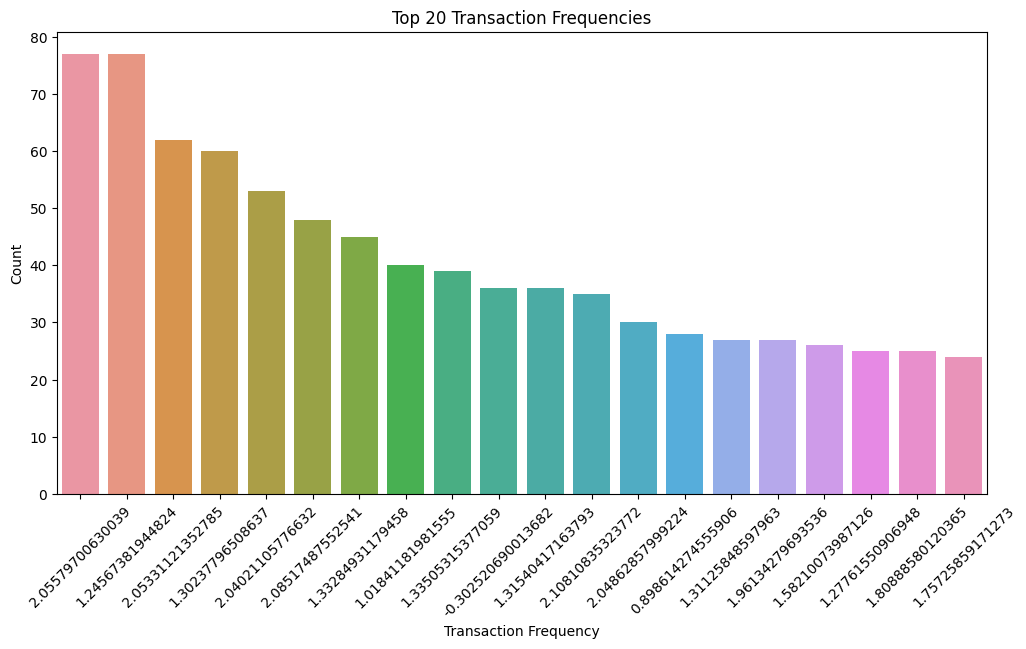

In [17]:
# 2. Distribution of transaction frequencies
plt.figure(figsize=(12, 6))
sns.countplot(x='V1', data=df, order=df['V1'].value_counts().index[:20])
plt.title('Top 20 Transaction Frequencies')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

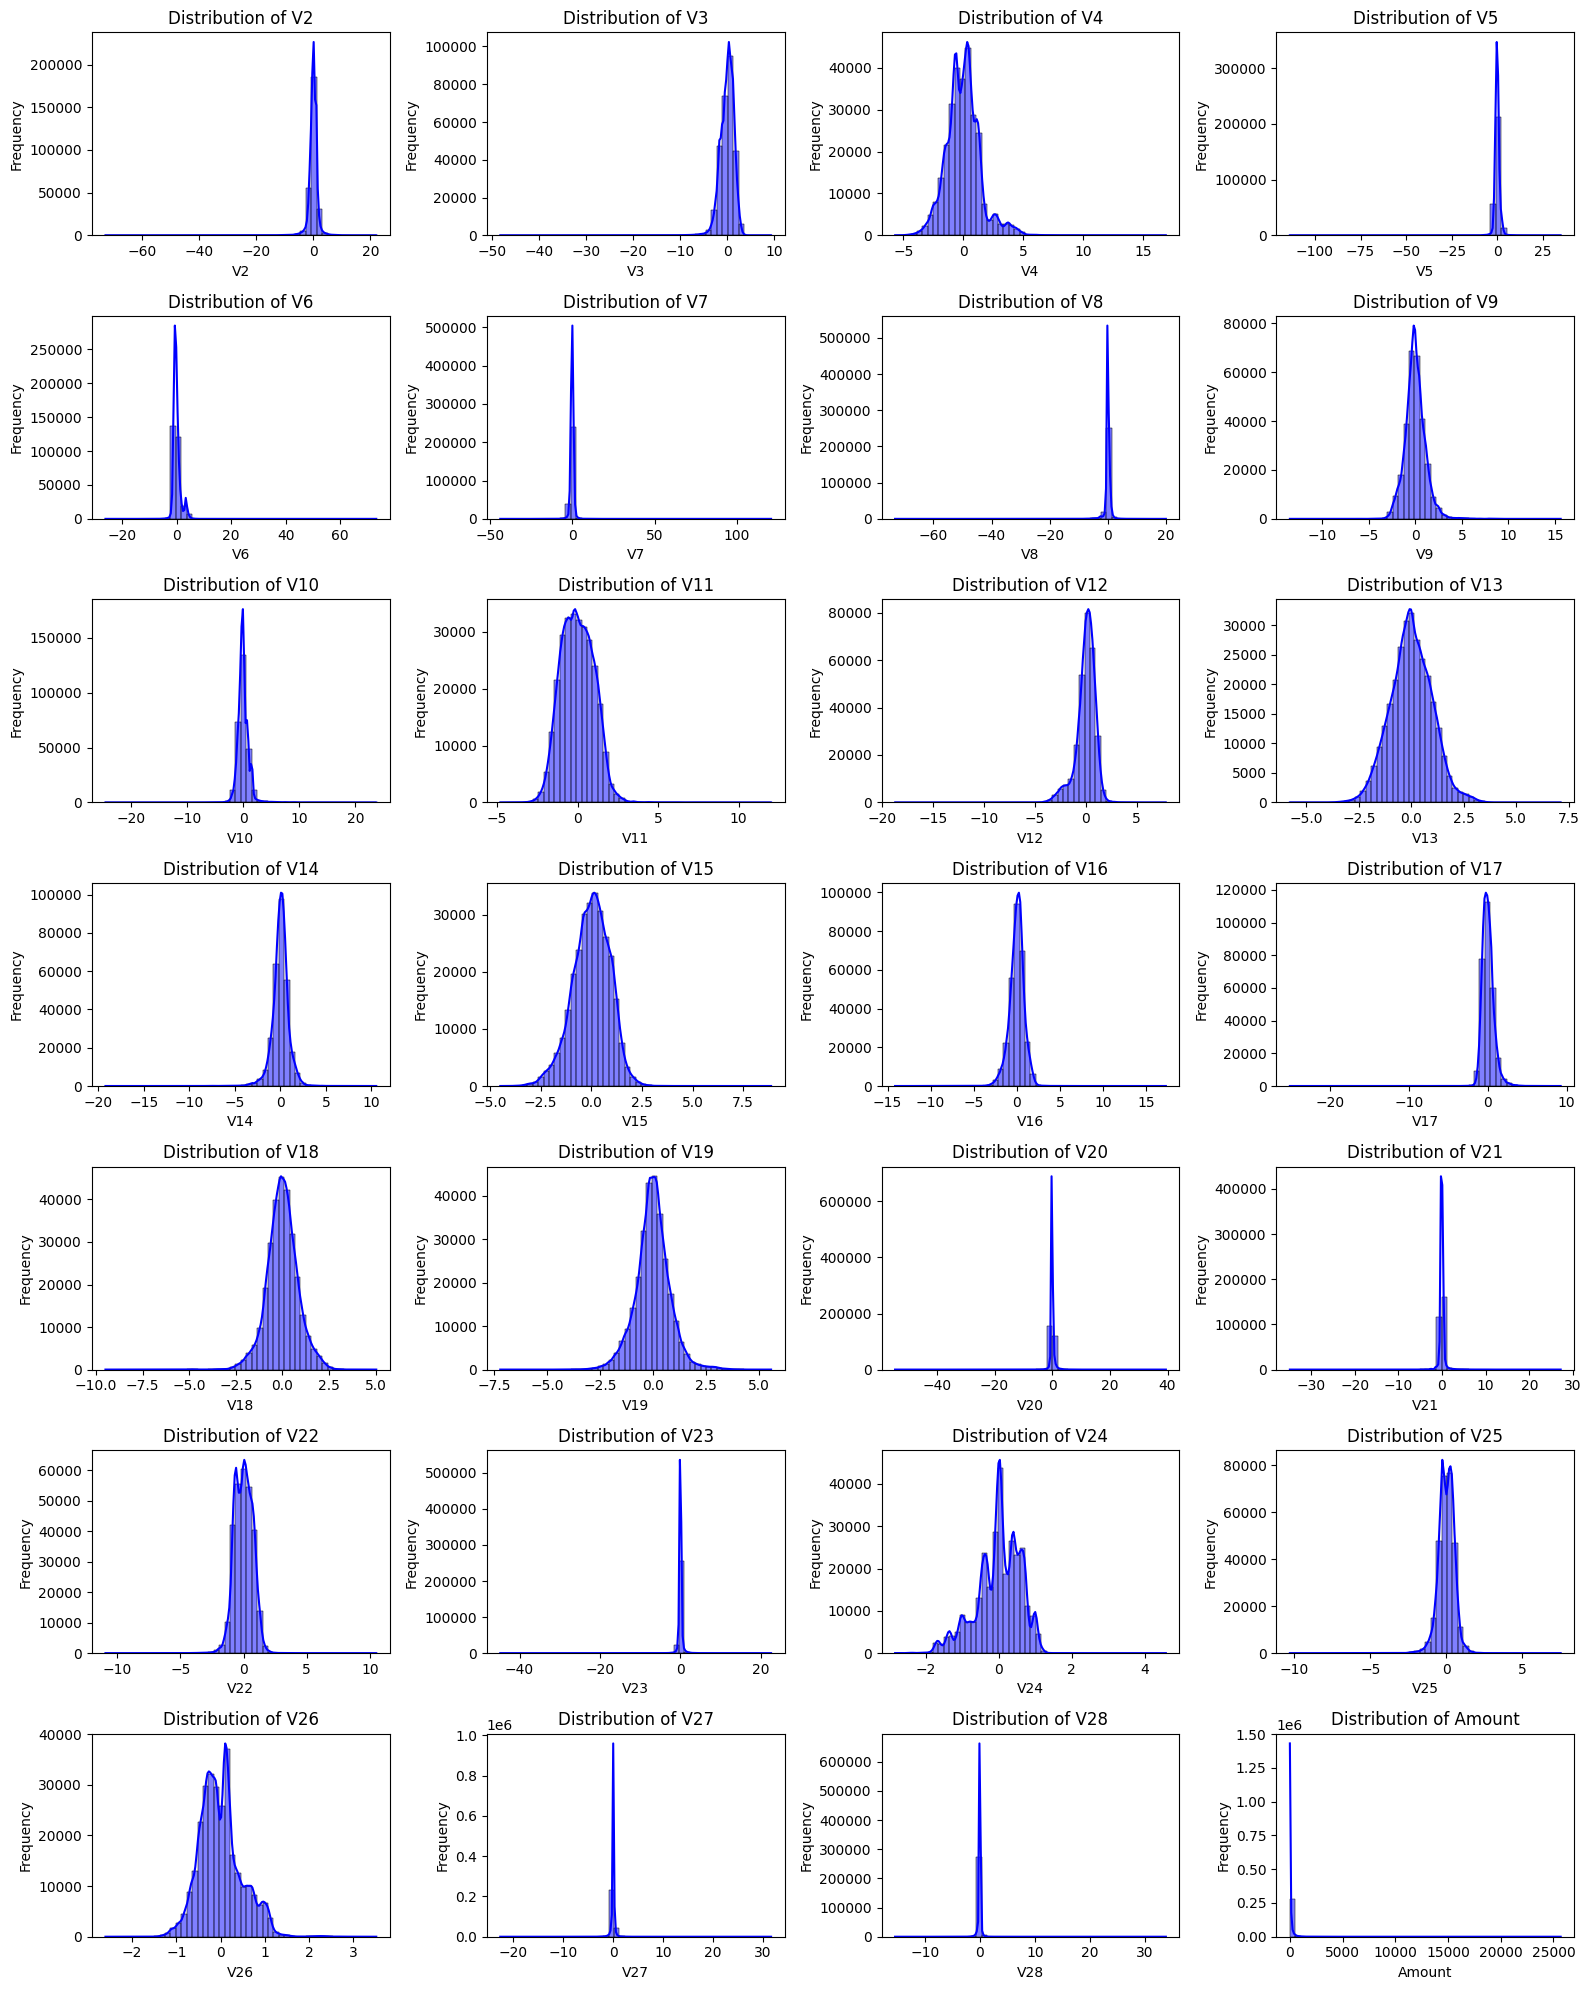

In [18]:
# 4. Distribution of features V1-V28
plt.figure(figsize=(16, 20))
for i, col in enumerate(df.columns[1:29], start=1):
    plt.subplot(7, 4, i)
    sns.histplot(df[col], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



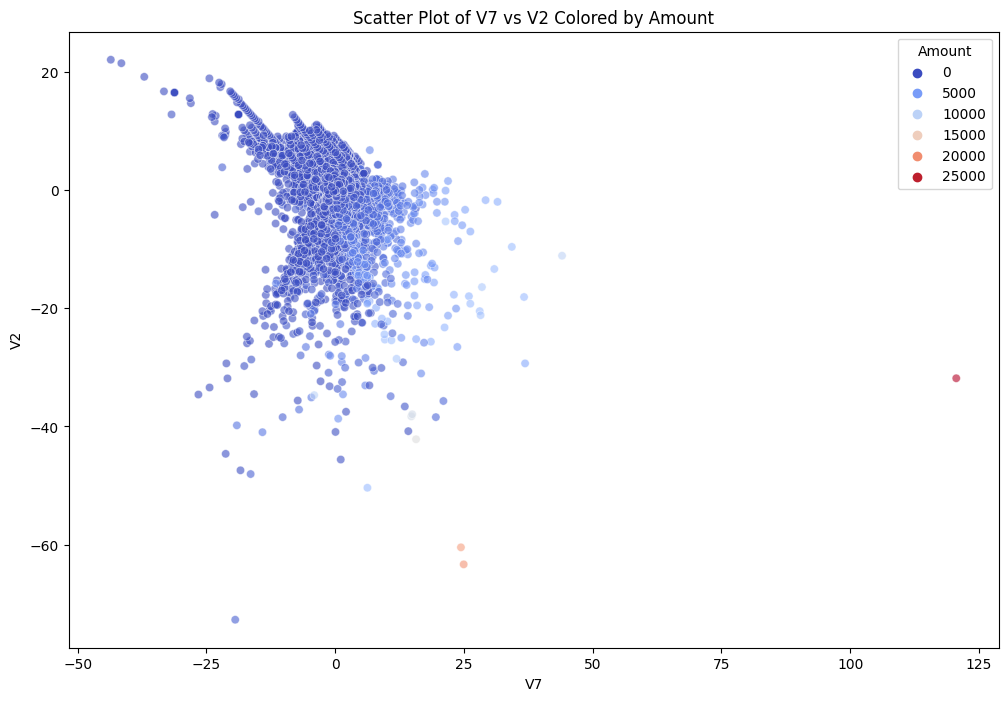

In [19]:
# 5. Scatter plot of two random features
plt.figure(figsize=(12, 8))
rand_features = np.random.choice(df.columns[1:29], size=2, replace=False)
sns.scatterplot(x=rand_features[0], y=rand_features[1], hue='Amount', data=df, palette='coolwarm', alpha=0.6)
plt.title(f'Scatter Plot of {rand_features[0]} vs {rand_features[1]} Colored by Amount')
plt.xlabel(rand_features[0])
plt.ylabel(rand_features[1])
plt.show()

# Train the Models

In [20]:
# Logistic Regression
lr_model = LogisticRegression()
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid,
                              scoring='f1', cv=3, n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Logistic Regression
best_lr_params = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_lr_params)

# Get the best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [21]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                               scoring='f1', cv=3, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Decision Tree
best_dt_params = dt_grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_dt_params)

# Get the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_

Best Hyperparameters for Decision Tree: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [22]:
# Random Forest
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring='f1', cv=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

Best Hyperparameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


# Model Evaluation

Model: LogisticRegression
Accuracy: 0.9527
Precision: 0.9775
Recall: 0.8788
F1 Score: 0.9255


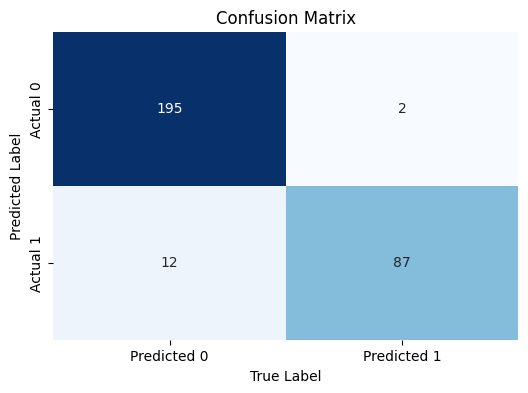

Model: DecisionTreeClassifier
Accuracy: 0.9561
Precision: 0.9574
Recall: 0.9091
F1 Score: 0.9326


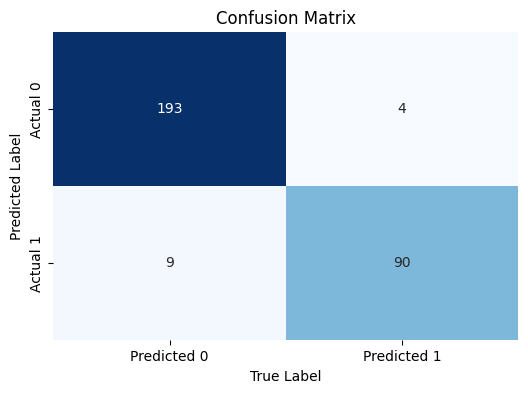

Model: RandomForestClassifier
Accuracy: 0.9595
Precision: 0.9780
Recall: 0.8990
F1 Score: 0.9368


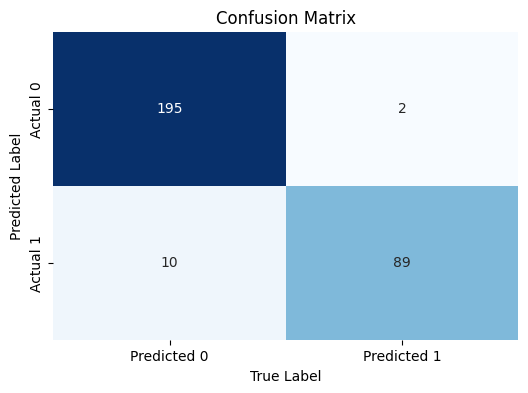

In [23]:
# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Model: {type(model).__name__}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the best Logistic Regression model
evaluate_model(best_lr_model, X_test, y_test)

# Evaluate the best Decision Tree model
evaluate_model(best_dt_model, X_test, y_test)

# Evaluate the best model
evaluate_model(best_rf_model, X_test, y_test)
